## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2023-01-10 09:53:33--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xvjzaxzz3ysphme/data_000637.txt [following]
--2023-01-10 09:53:34--  https://www.dropbox.com/s/raw/xvjzaxzz3ysphme/data_000637.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca6225744d5a38147b55877c598.dl.dropboxusercontent.com/cd/0/inline/B0QYWs_moSFUZ-vrd2GoPRPCP7Y-NE_N1LjIDFw4quckgvirCWrVYftenwyKzJtCuCEbbzpXPqUHVEiNcUYrv-O_sON8frmDcM8pFrHvl35PzDtt1MJFZepKvhFzfdYLSeagYgvo--0727B0qL4h_fSIaS3Yg_apCv6qgoiVZ2co-g/file# [following]
--2023-01-10 09:53:34--  https://uca6225744d5a38147b55877c598.dl.dropboxusercontent.com/cd/0/inline/B0QYWs_moSFUZ-vrd2GoPRPCP7Y-NE_N1LjIDFw4quckgvirCWrVYftenwyKzJtCuCEb

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [5]:
import numpy as np
import pandas as pd

In [17]:
#1. 
#N = 25000
#data = np.loadtxt('/home/vepe/data/data_000637.txt.9', delimiter=',', skiprows=1, max_rows=N)

data = np.loadtxt('/home/vepe/data/data_000637.txt.9', delimiter=',', skiprows=1)
columns = np.loadtxt('/home/vepe/data/data_000637.txt.9', delimiter=',', max_rows=1, dtype=str)

data = pd.DataFrame(data, columns=columns)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1.0,0.0,123.0,3.869200e+09,2374.0,26.0
1,1.0,0.0,124.0,3.869200e+09,2374.0,27.0
2,1.0,0.0,63.0,3.869200e+09,2553.0,28.0
3,1.0,0.0,64.0,3.869200e+09,2558.0,19.0
4,1.0,0.0,64.0,3.869200e+09,2760.0,25.0
...,...,...,...,...,...,...
1310715,1.0,0.0,62.0,3.869211e+09,762.0,14.0
1310716,1.0,1.0,4.0,3.869211e+09,763.0,11.0
1310717,1.0,0.0,64.0,3.869211e+09,764.0,0.0
1310718,1.0,0.0,139.0,3.869211e+09,769.0,0.0


<AxesSubplot:>

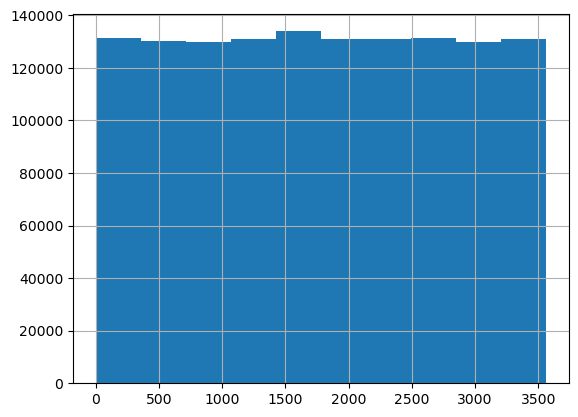

In [26]:
data['BX_COUNTER'].hist()

In [23]:
#2
data.sort_values(by='BX_COUNTER', ascending=True)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
822600,1.0,0.0,59.0,3.869208e+09,0.0,24.0
1038564,1.0,0.0,23.0,3.869209e+09,0.0,13.0
245819,1.0,0.0,57.0,3.869203e+09,0.0,0.0
1181637,1.0,0.0,139.0,3.869210e+09,0.0,0.0
392184,1.0,1.0,11.0,3.869204e+09,0.0,29.0
...,...,...,...,...,...,...
965128,1.0,1.0,20.0,3.869209e+09,3563.0,29.0
965124,1.0,1.0,139.0,3.869209e+09,3563.0,0.0
991068,1.0,1.0,24.0,3.869209e+09,3563.0,2.0
118156,1.0,0.0,54.0,3.869201e+09,3563.0,16.0


From the histogram we can clearly see that there is absolute max in the BX_Counter, and it must be the last digit before the Orbit_Cnt is increased by 1.

In [31]:
x = data['BX_COUNTER'].max() + 1
print(x)

3564.0


In [32]:
data.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
count,1310720.0,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06
mean,1.0,2.959198e-01,5.582570e+01,3.869206e+09,1.781096e+03,1.332340e+01,9.673513e+01
std,0.0,4.564553e-01,3.901034e+01,3.183124e+03,1.027795e+03,9.199886e+00,3.475583e-03
min,1.0,0.000000e+00,1.000000e+00,3.869200e+09,0.000000e+00,0.000000e+00,9.673009e+01
25%,1.0,0.000000e+00,2.600000e+01,3.869203e+09,8.930000e+02,5.000000e+00,9.673242e+01
50%,1.0,0.000000e+00,5.700000e+01,3.869207e+09,1.778000e+03,1.300000e+01,9.673519e+01
75%,1.0,1.000000e+00,6.400000e+01,3.869209e+09,2.670000e+03,2.100000e+01,9.673584e+01
max,1.0,1.000000e+00,1.390000e+02,3.869211e+09,3.563000e+03,2.900000e+01,9.674266e+01


In [42]:
#3 and 4
time = data['ORBIT_CNT']*x*25 + data['BX_COUNTER']*25 + data['TDC_MEAS']*(25/30)
data['TIME [sec]'] = time*10**(-9)
duration = data['TIME [sec]'].max() - data['TIME [sec]'].min()
print('Duration of the experiment: ', duration, 'sec')  

Duration of the experiment:  0.9804162533255294 sec


In [43]:
data.describe()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,TIME [sec]
count,1310720.0,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06,1.310720e+06
mean,1.0,2.959198e-01,5.582570e+01,3.869206e+09,1.781096e+03,1.332340e+01,3.447463e+05,3.447463e+05
std,0.0,4.564553e-01,3.901034e+01,3.183124e+03,1.027795e+03,9.199886e+00,2.836162e-01,2.836162e-01
min,1.0,0.000000e+00,1.000000e+00,3.869200e+09,0.000000e+00,0.000000e+00,3.447457e+05,3.447457e+05
25%,1.0,0.000000e+00,2.600000e+01,3.869203e+09,8.930000e+02,5.000000e+00,3.447460e+05,3.447460e+05
50%,1.0,0.000000e+00,5.700000e+01,3.869207e+09,1.778000e+03,1.300000e+01,3.447463e+05,3.447463e+05
75%,1.0,1.000000e+00,6.400000e+01,3.869209e+09,2.670000e+03,2.100000e+01,3.447465e+05,3.447465e+05
max,1.0,1.000000e+00,1.390000e+02,3.869211e+09,3.563000e+03,2.900000e+01,3.447467e+05,3.447467e+05


In [44]:
#5

a = np.random.randint(0, 2, size=len(data['HEAD']))
data['HEAD'] = a

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,TIME [sec]
0,1,0.0,123.0,3.869200e+09,2374.0,26.0,344745.734939,344745.734939
1,0,0.0,124.0,3.869200e+09,2374.0,27.0,344745.734939,344745.734939
2,1,0.0,63.0,3.869200e+09,2553.0,28.0,344745.734944,344745.734944
3,0,0.0,64.0,3.869200e+09,2558.0,19.0,344745.734944,344745.734944
4,1,0.0,64.0,3.869200e+09,2760.0,25.0,344745.734949,344745.734949
...,...,...,...,...,...,...,...,...
1310715,1,0.0,62.0,3.869211e+09,762.0,14.0,344746.715355,344746.715355
1310716,1,1.0,4.0,3.869211e+09,763.0,11.0,344746.715355,344746.715355
1310717,0,0.0,64.0,3.869211e+09,764.0,0.0,344746.715355,344746.715355
1310718,0,0.0,139.0,3.869211e+09,769.0,0.0,344746.715355,344746.715355


In [55]:
#6
data1 = data[data['HEAD']==1]
data1

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME,TIME [sec]
0,1,0.0,123.0,3.869200e+09,2374.0,26.0,344745.734939,344745.734939
2,1,0.0,63.0,3.869200e+09,2553.0,28.0,344745.734944,344745.734944
4,1,0.0,64.0,3.869200e+09,2760.0,25.0,344745.734949,344745.734949
5,1,0.0,63.0,3.869200e+09,2762.0,4.0,344745.734949,344745.734949
10,1,1.0,7.0,3.869200e+09,2785.0,4.0,344745.734949,344745.734949
...,...,...,...,...,...,...,...,...
1310710,1,1.0,36.0,3.869211e+09,427.0,13.0,344746.715347,344746.715347
1310713,1,0.0,64.0,3.869211e+09,758.0,18.0,344746.715355,344746.715355
1310715,1,0.0,62.0,3.869211e+09,762.0,14.0,344746.715355,344746.715355
1310716,1,1.0,4.0,3.869211e+09,763.0,11.0,344746.715355,344746.715355


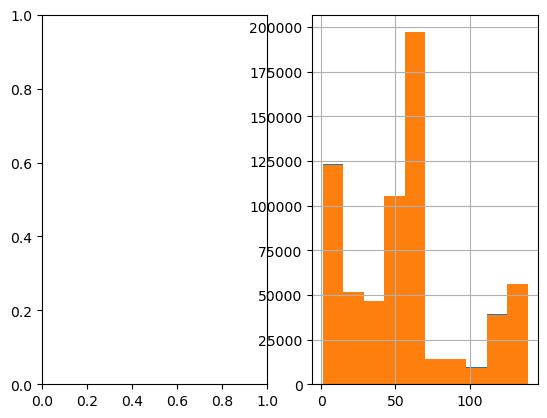

In [56]:
#7
import matplotlib.pyplot as plt
fig, (ax, ax1) = plt.subplots(1,2)
ax = data[data['HEAD']==0]['TDC_CHANNEL'].hist()
ax1 = data[data['HEAD']==1]['TDC_CHANNEL'].hist()